In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# !pip install fastai==1.0.61

In [3]:
# !pip install timm

In [4]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from PIL import Image
import os
from glob import glob
import cv2
from tqdm import tqdm
import multiprocessing as mp
import pandas as pd
from matplotlib import pyplot as plt
from torchvision import transforms
import timm

# from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
import torch.nn.functional as F


In [6]:
from utils import interleave, de_interleave, show_batch, AverageMeter, show_grid, get_config
from learner import SemiSupLearning, SupLearning
from dataset import get_data
from build import build_model

In [7]:
config = get_config('./configs/local_semisupervised_real_groupbycat.yaml')

In [8]:
df_anno = pd.read_csv(config['DATA']['ANNO'])
df_unanno = pd.read_csv(config['DATA']['UNANNO'])
df_anno.head()

,Organ,Classification,Finding,Image,Categories,is_valid,Groupby_Categories
0,lower-gi-tract,therapeutic-interventions,dyed-resection-margins,lower-gi-tract/therapeutic-interventions/dyed-...,0,False,0
1,lower-gi-tract,quality-of-mucosal-views,bbps-2-3,lower-gi-tract/quality-of-mucosal-views/bbps-2...,0,False,0
2,upper-gi-tract,pathological-findings,barretts-short-segment,upper-gi-tract/pathological-findings/barretts-...,1,False,5
3,lower-gi-tract,quality-of-mucosal-views,bbps-0-1,lower-gi-tract/quality-of-mucosal-views/bbps-0...,0,False,0
4,upper-gi-tract,anatomical-landmarks,z-line,upper-gi-tract/anatomical-landmarks/z-line/87c...,0,False,0


In [9]:
df_unanno.head()

,Image
0,./unlabeled-images-deform/7cee06d5-436d-4eb8-b...
1,./unlabeled-images-deform/fd17055e-a6d4-4d89-b...
2,./unlabeled-images-deform/53485c77-31d5-4405-b...
3,./unlabeled-images-deform/91b98665-599d-4d31-8...
4,./unlabeled-images-deform/dc54382b-5791-457f-8...


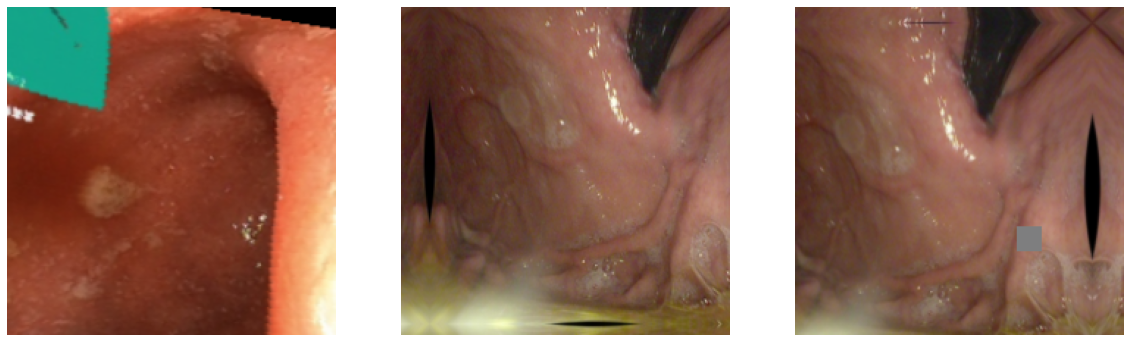

In [10]:
train_dl, valid_dl = get_data(config, df_anno, df_unanno, is_visual=True)

In [11]:
model = build_model(config)

In [16]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [17]:
if config.TRAIN.IS_SSL:
    classifier = SemiSupLearning(model = model,
                          opt_func=config['TRAIN']['OPT_NAME'], 
                          device = device)
else:
    classifier = SupLearning(model = model,
                          opt_func=config['TRAIN']['OPT_NAME'], 
                          device = device)
classifier.get_dataloader(train_dl, valid_dl)
classifier.get_config(config)

In [18]:
classifier.evaluate_one(True, True, True)

In [18]:
# classifier.fit()

Training epoch: 1 | Current LR: 0.000050


  0%|                                             | 1/14203 [01:25<336:55:40, 85.41s/it, loss=1.68]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\cls\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-1e52701ef5b5>", line 1, in <module>
    classifier.fit()
  File "C:\Users\Admin\working\python\mine\endoscopic\code\learner.py", line 159, in fit
    train_loss = self.train_one(self.epoch)
  File "C:\Users\Admin\working\python\mine\endoscopic\code\learner.py", line 98, in train_one
    losses.backward()
  File "C:\Users\Admin\anaconda3\envs\cls\lib\site-packages\torch\_tensor.py", line 307, in backward
    torch.autograd.backward(self, gradient, retain_graph, create_graph, inputs=inputs)
  File "C:\Users\Admin\anaconda3\envs\cls\lib\site-packages\torch\autograd\__init__.py", line 156, in backward
    allow_unreachable=True, accumulate_grad=True)  # allow_unreachable flag
KeyboardInterrupt

During handling of the above exception, another exception occurred:

TypeError: object of type 'NoneType' has no len()

In [21]:
# len(train_dl[0]),len(train_dl[1])

In [16]:
# classifier.save_checkpoint('./')

In [17]:
# classifier.load_checkpoint('./05_08_2022_19_21_56.pth')